In [315]:
#imports

import numpy
import pandas as pd
import math
import datetime
import holidays
from matplotlib import pyplot as plt

In [316]:
#allow to change individual cell values
pd.set_option('mode.chained_assignment', None)

data = pd.read_csv("ResumoDataEnsaios.csv", delimiter=";")

In [317]:
data = data.rename(columns={'Data Ensaio': 'Data'})
data = data.drop(columns='Projeto')
data = data.dropna()

In [318]:
data.head(5)

,Tipo,Data,Duraçao
0,CT,17/04/2019,3.0
1,CT,27/08/2018,3.0
2,CT,04/06/2018,3.0
3,CT,22/01/2018,3.0
4,CT,26/03/2018,4.0


In [319]:
#Get day, month, year

data['dia'] = data['Data'].str.slice(stop=2)
data['mes'] = data['Data'].str.slice(start=3, stop=5)
data['ano'] = data['Data'].str.slice(start=6)

data["dia"] = data["dia"].apply(pd.to_numeric)
data["mes"] = data["mes"].apply(pd.to_numeric)
data["ano"] = data["ano"].apply(pd.to_numeric)

In [320]:
#Continuous Julian date with added year

data['dia_juliano'] = 0

for i in range(0,len(data['mes'])):
    data['dia_juliano'][i] = int(datetime.date(data['ano'][i],data['mes'][i],data['dia'][i]).timetuple().tm_yday)

data['dia_juliano'] =  data['dia_juliano'] + (data['ano'] -2017)*365

In [321]:
#Get weekday

data['dia_semana'] = 0

for i in range(0,len(data['ano'])):
    data['dia_semana'][i] = datetime.date(data['ano'][i],
                                      data['mes'][i],
                                      data['dia'][i]).weekday()


In [322]:
# Get after holiday bool variable

holidays = holidays.PT()

data['dps_fri'] = 0

for i in range(0,len(data['mes'])):
    data['dps_fri'][i] = ((datetime.date(data['ano'][i],data['mes'][i],data['dia'][i]) - datetime.timedelta(days=1)) in holidays)

In [323]:
#Get periodic variables from cos of linear interpolation


data['per_mes'] = ((data['mes']-1)/(12-1))*(2*math.pi)
data['per_dia'] = ((data['dia']-1)/(31-1))*(2*math.pi)
data['per_dia_semana'] = ((data['dia_semana']-0)/(6-0))*(2*math.pi)
data['per_dia_juliano'] = ((data['dia_juliano']-1)/(365-1))*(2*math.pi)

for i in range(0,len(data['per_mes'])):
    data['per_mes'][i]=math.cos(data['per_mes'][i])

for i in range(0,len(data['per_dia'])):
    data['per_dia'][i]=math.cos(data['per_dia'][i])

for i in range(0,len(data['per_dia_semana'])):
    data['per_dia_semana'][i]=math.cos(data['per_dia_semana'][i])

for i in range(0,len(data['per_dia_juliano'])):
    data['per_dia_juliano'][i]=math.cos(data['per_dia_juliano'][i])

In [324]:
data.head(5)

,Tipo,Data,Duraçao,dia,mes,ano,dia_juliano,dia_semana,dps_fri,per_mes,per_dia,per_dia_semana,per_dia_juliano
0,CT,17/04/2019,3.0,17,4,2019,837,2,False,-0.142315,-0.978148,-0.5,-0.289252
1,CT,27/08/2018,3.0,27,8,2018,604,0,False,-0.654861,0.669131,1.0,-0.553775
2,CT,04/06/2018,3.0,4,6,2018,520,0,False,-0.959493,0.809017,1.0,-0.893346
3,CT,22/01/2018,3.0,22,1,2018,387,0,False,1.000000,-0.309017,1.0,0.928756
4,CT,26/03/2018,4.0,26,3,2018,450,0,False,0.415415,0.500000,1.0,0.103384


In [325]:
data.describe()

,Duraçao,dia,mes,ano,dia_juliano,dia_semana,per_mes,per_dia,per_dia_semana,per_dia_juliano
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2.881944,14.736111,6.548611,2019.107639,952.197917,1.770833,0.166909,0.067368,-0.015625,0.086764
std,0.855371,9.036115,3.676519,1.035373,346.890848,1.463701,0.747168,0.725601,0.825718,0.722563
min,1.000000,1.000000,1.000000,2017.000000,205.000000,0.000000,-0.959493,-1.000000,-1.000000,-0.999404
25%,2.000000,6.750000,3.000000,2018.000000,689.500000,0.000000,-0.654861,-0.669131,-1.000000,-0.626840
50%,3.000000,14.000000,6.000000,2019.000000,962.000000,2.000000,0.415415,0.104528,-0.500000,0.188738
75%,3.000000,23.000000,10.000000,2020.000000,1179.500000,3.000000,0.841254,0.809017,1.000000,0.813056
max,7.000000,31.000000,12.000000,2021.000000,1716.000000,6.000000,1.000000,1.000000,1.000000,0.999404


In [326]:
#Média por Tipo

pd.DataFrame({
    'CT': [data[data['Tipo']=='CT']['Duraçao'].mean()],
    'ST':[data[data['Tipo']=='ST']['Duraçao'].mean()],
    'Total': [data['Duraçao'].mean()]})


,CT,ST,Total
0,2.872587,2.965517,2.881944


In [333]:
#Média por Tipo agrupada por dia

df_med_dia = pd.concat(
    [data[data['Tipo']=='CT'].groupby('dia')['Duraçao'].mean().rename('CT')
    ,data[data['Tipo']=='ST'].groupby('dia')['Duraçao'].mean().rename('ST'),
    data.groupby('dia')['Duraçao'].mean().rename('Total')]
    ,axis=1)

df_med_dia

,CT,ST,Total
dia,,,
1,2.800000,NaN,2.800000
2,2.937500,NaN,2.937500
3,2.777778,2.000000,2.700000
4,2.818182,NaN,2.818182
5,2.416667,NaN,2.416667
6,2.923077,NaN,2.923077
7,3.000000,2.000000,2.857143
8,3.000000,NaN,3.000000
9,3.000000,2.500000,2.900000


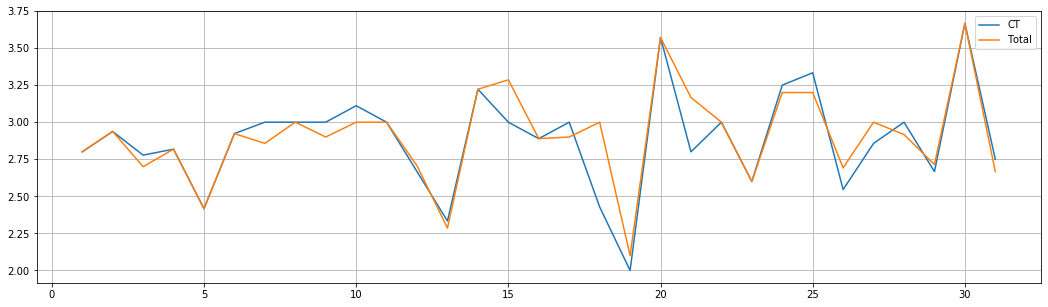

In [334]:
plt.plot(df_med_dia['CT'], label='CT')
plt.plot(df_med_dia['Total'], label='Total')
plt.legend()
plt.grid()
fit = plt.gcf()
fit.set_size_inches(18,5)

In [335]:
#Média por Tipo agrupada por dia da semana (0 Segunda / 6 Domingo)

df_med_dia_sem = pd.concat(
    [data[data['Tipo']=='CT'].groupby('dia_semana')['Duraçao'].mean().rename('CT')
    ,data[data['Tipo']=='ST'].groupby('dia_semana')['Duraçao'].mean().rename('ST'),
    data.groupby('dia_semana')['Duraçao'].mean().rename('Total')]
    ,axis=1)

df_med_dia_sem

,CT,ST,Total
dia_semana,,,
0,2.926471,3.111111,2.965116
1,3.045455,NaN,3.045455
2,2.822222,2.000000,2.787234
3,2.816901,2.714286,2.807692
4,2.769231,3.500000,2.821429
5,2.500000,NaN,2.500000
6,2.000000,NaN,2.000000


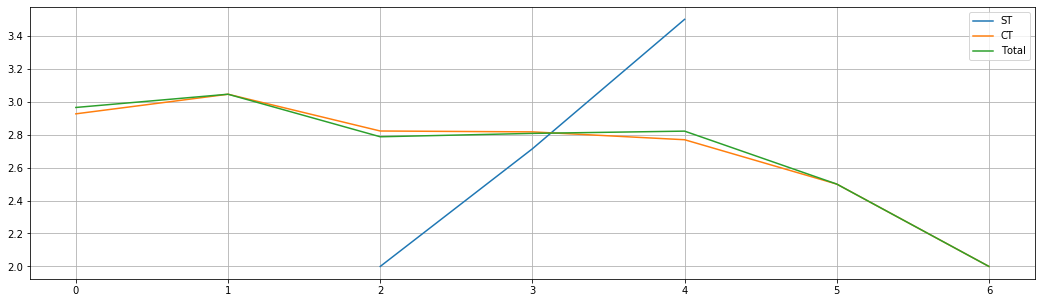

In [336]:
plt.plot(df_med_dia_sem['ST'], label='ST')
plt.plot(df_med_dia_sem['CT'], label='CT')
plt.plot(df_med_dia_sem['Total'], label='Total')
plt.legend()
plt.grid()
fit = plt.gcf()
fit.set_size_inches(18,5)

In [327]:
#Média por Tipo agrupada por mês

df_med_mes = pd.concat(
    [data[data['Tipo']=='CT'].groupby('mes')['Duraçao'].mean().rename('CT')
    ,data[data['Tipo']=='ST'].groupby('mes')['Duraçao'].mean().rename('ST'),
    data.groupby('mes')['Duraçao'].mean().rename('Total')]
    ,axis=1)

df_med_mes

,CT,ST,Total
mes,,,
1,2.750000,4.000000,2.870968
2,2.560000,NaN,2.560000
3,2.681818,3.000000,2.695652
4,2.888889,3.000000,2.894737
5,2.842105,3.500000,2.904762
6,2.800000,5.000000,2.884615
7,3.176471,2.500000,3.047619
8,3.444444,2.000000,3.368421
9,3.111111,3.000000,3.095238


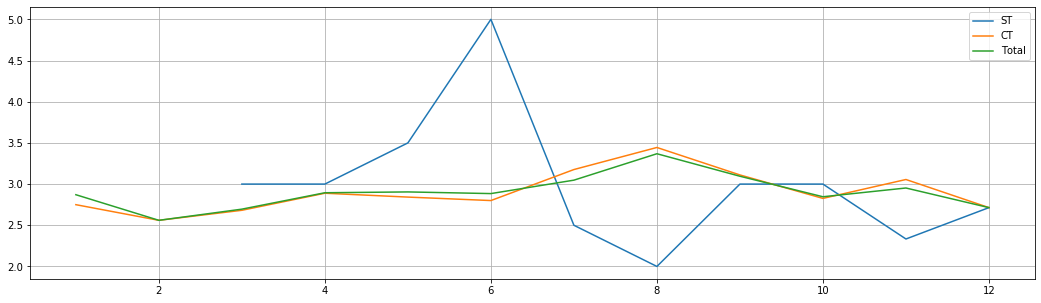

In [328]:
plt.plot(df_med_mes['ST'], label='ST')
plt.plot(df_med_mes['CT'], label='CT')
plt.plot(df_med_mes['Total'], label='Total')
plt.legend()
plt.grid()
fit = plt.gcf()
fit.set_size_inches(18,5)

In [331]:
#Média por Tipo agrupada por ano

df_med_ano = pd.concat(
    [data[data['Tipo']=='CT'].groupby('ano')['Duraçao'].mean().rename('CT')
    ,data[data['Tipo']=='ST'].groupby('ano')['Duraçao'].mean().rename('ST'),
    data.groupby('ano')['Duraçao'].mean().rename('Total')]
    ,axis=1)

df_med_ano

,CT,ST,Total
ano,,,
2017,2.250000,2.285714,2.272727
2018,2.725806,2.900000,2.750000
2019,3.009346,3.500000,3.043478
2020,3.117647,3.250000,3.127273
2021,2.428571,NaN,2.428571


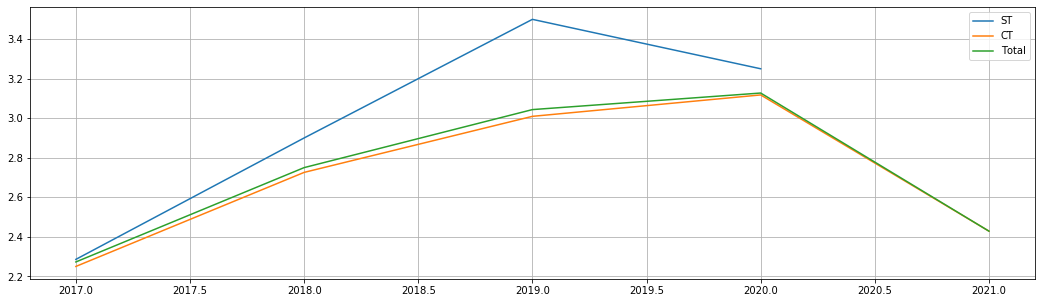

In [332]:
plt.plot(df_med_ano['ST'], label='ST')
plt.plot(df_med_ano['CT'], label='CT')
plt.plot(df_med_ano['Total'], label='Total')
plt.legend()
plt.grid()
fit = plt.gcf()
fit.set_size_inches(18,5)